In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Getting set up to export text correctly

If you're exporting text, you need to make sure `matplotlib` is exporting **editable** text, otherwise Illustrator will treat every single character as a shape instead of text. By default `matplotlib` exports "Type 3 fonts" which Adobe Illustrator doesn't understand, so you need to change matplotlib to export **Type 2/TrueType fonts**.

This setting is, for some reason, the number `42`. Run this once at the top of your code and you'll be set for everything else in the script/notebook.

In [127]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

If you don't want to type this all of the time (which you shouldn't), there is a solution! Run the following code **from the command line** - it creates a `matplotlib` startup file that will run the above commands every time `matplotlib` is started.

````bash
mkdir -p ~/.matplotlib
echo 'pdf.fonttype: 42' >> ~/.matplotlib/matplotlibrc
echo 'ps.fonttype: 42' >> ~/.matplotlib/matplotlibrc
````

## Reading in our data

In [128]:
df = pd.read_csv("countries.csv")
df.head()

,Country,Continent,GDP_per_capita,life_expectancy,Population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827
3,Angola,Africa,2446,45.234,13926373
4,Antigua and Barbuda,N. America,12738,73.544,77656


## Exporting

**Be sure to read the section above above about exporting text.**

After you make your graphic, use `plt.savefig("filename.pdf")` to save it as a vector-graphic `.pdf`. Do not save as `png` or `jpg` or anythign else. You *could* save as `svg` but I've found `pdf` generally works better.

You'll also need to pass `transparent=True` when using `.savefig` to get rid of white backgrounds. It makes your file much easier to work with in Illustrator. 

Even though it's just `plt.savefig` again and again, I've included several examples below.

## Example 1, bar chart

Setting `linewidth=0` allows you to easily remove the lines around bars when in Illustrator. `plt.savefig` is the bit that saves your graph.

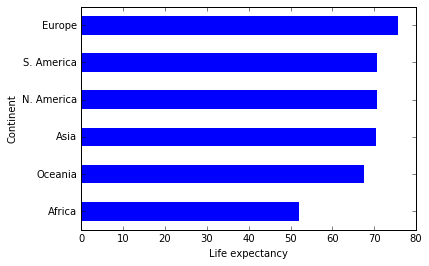

In [133]:
ax = df.groupby("Continent")['life_expectancy'].median().sort_values().plot(kind='barh', linewidth=0)
ax.set_xlabel("Life expectancy")

# Remember: transparent=True
plt.savefig("output-bargraph.pdf", transparent=True)

# Example 2, scatterplot

Here I've passed a lot of arguments in to the `.scatter` method. It's still `plt.savefig` to save, though.

Use `linewidth=0` to remove the outline of the circles (although it will still be there, invisible, for you to remove in Illustrator).

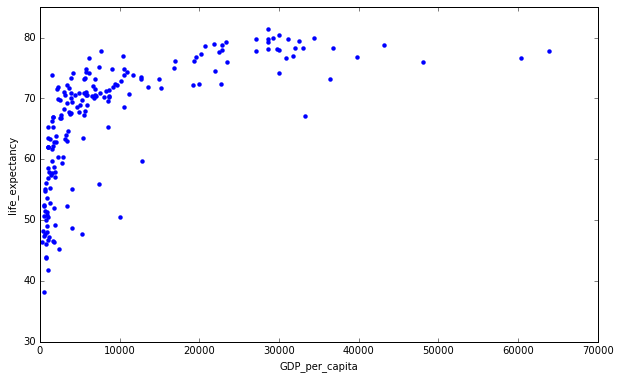

In [134]:
df.plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', linewidth=0, xlim=(0, 70000), ylim=(30, 85), figsize=(10, 6))
plt.savefig("output-scatter.pdf", transparent=True)

## Example 3, grouped scatterplot

Setting `markeredgewidth=0` allows you to easily remove the invisible borders around the circles when in Illustrator. It has the same effect as `linewidth=0` in the previous example, but the code is different because we're directly using `matplotlib` instead of going through `pandas` (`ax.plot` instead of `df.plot`).

But despite it being crazy complicated: `plt.savefig` once again.

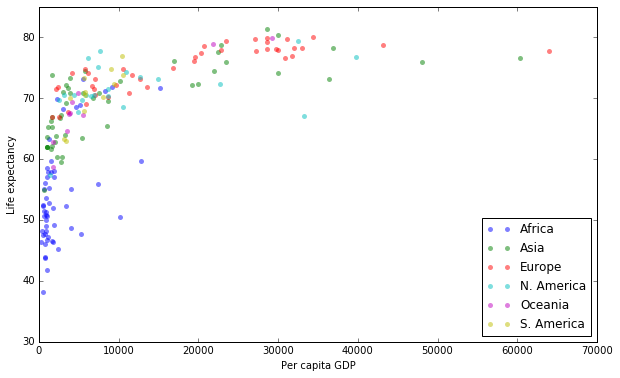

In [135]:
fig, ax = plt.subplots(figsize=(10,6))
for category, selection in df.groupby('Continent'):
    ax.plot(selection['GDP_per_capita'], selection['life_expectancy'], marker='o', markersize=5, alpha=0.5, linestyle='', label=category, markeredgewidth=0)

ax.set_ylabel("Life expectancy")
ax.set_xlabel("Per capita GDP")
ax.set_ylim((30,85))
ax.legend(loc='lower right')

# Remember: transparent=True
plt.savefig("output-scatter-grouped.pdf", transparent=True)